# Summary

* Name: `dissipation-theory--Study-1.ipynb`
* Author: John A. Marohn
* Date: 2023-06-19
* Continued from: ---
* Continued to: ---
* Summary: Explore Loring's recently revised theory for friction over metals.

# Preliminaries

In [1]:
import numpy as np
from dissipationtheory.constants import ureg, epsilon0
import matplotlib.pyplot as plt
from scipy import integrate

# Parameters

## Gold parameters

Put the parameters in a dictionary.

In [2]:
metal = {
    'v_F': ureg.Quantity(1.4e6, "m s^{-1}"),    # electron Fermi velocity
    'omega_p': ureg.Quantity(1.3e16, "s^{-1}"), # electron plasma oscillation frequency
    'nu': ureg.Quantity(7.1e13, "s^{-1}"),      # electron plasma oscillation decay rate
    'thickness': ureg.Quantity(100, "nm")       # sample thickness
}

Compute the electron mean free path.

In [3]:
(metal['v_F']/metal['nu']).to('nm')

19.718309859154928 <Unit('nanometer')>

## Cantilever parameters

Again, put the parameters in a dictionary.

In [4]:
cantilever = {
    'omega_c': 2*np.pi*ureg.Quantity(8000, "s^{-1}"), # cantilever frequency
    'q_c': ureg.Quantity(1.602e-19, "C")              # cantilever charge
}

# Explore the unitless parameters

In [5]:
k = ureg.Quantity(np.linspace(start=0.05, stop=1.0, num=20), "nm^{-1}")
k

Magnitude,[0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.39999999999999997 0.44999999999999996 0.49999999999999994 0.5499999999999999 0.6 0.65 0.7 0.75 0.7999999999999999 0.85 0.9 0.95 1.0]
Units,1/nanometer


We find that $\tilde{\omega} \ll 1$, in agreement with Loring's claim on the third paragraph of p 6311 of Loring 2022.

In [6]:
omega_bar = cantilever['omega_c']/(k * metal['v_F'])
omega_bar.to_base_units()

Magnitude,[7.180783208205242e-10 3.590391604102621e-10 2.39359440273508e-10 1.7951958020513105e-10 1.4361566416410482e-10 1.19679720136754e-10 1.0258261726007489e-10 8.975979010256553e-11 7.978648009116937e-11 7.180783208205242e-11 6.527984734732038e-11 5.9839860068377e-11 5.523679390927109e-11 5.1291308630037446e-11 4.787188805470161e-11 4.4879895051282763e-11 4.2239901224736716e-11 3.9893240045584676e-11 3.7793595832659166e-11 3.5903916041026206e-11]
Units,dimensionless


The other unitless parameters, $\tilde{\nu}$ and $\tilde{\omega}_{\mathrm{p}}$, do not satisfy this inequality.

In [7]:
nu_bar = metal['nu']/(k * metal['v_F'])
nu_bar.to_base_units()

Magnitude,[1.0142857142857142 0.5071428571428571 0.3380952380952381 0.25357142857142856 0.20285714285714287 0.16904761904761906 0.1448979591836735 0.12678571428571428 0.11269841269841273 0.10142857142857145 0.09220779220779222 0.08452380952380953 0.07802197802197802 0.07244897959183676 0.06761904761904762 0.06339285714285714 0.05966386554621849 0.05634920634920636 0.05338345864661655 0.05071428571428572]
Units,dimensionless


In [8]:
omega_p_bar = metal['omega_p']/(k * metal['v_F'])
omega_p_bar.to_base_units()

Magnitude,[185.71428571428572 92.85714285714286 61.904761904761905 46.42857142857143 37.14285714285714 30.952380952380953 26.530612244897963 23.214285714285715 20.63492063492064 18.571428571428577 16.883116883116887 15.476190476190476 14.285714285714286 13.265306122448981 12.380952380952381 11.607142857142858 10.924369747899162 10.317460317460318 9.774436090225564 9.285714285714285]
Units,dimensionless


# Explore the functions

Create and plot the function $g(\nu)$, eq. 15 in Loring 2022.  Call this function `g_1`.

In [9]:
def g1(x):
    try:
        x = x.to_base_units()
    except:
        pass
    return 1 + x*(np.arctan(x) - np.pi/2)

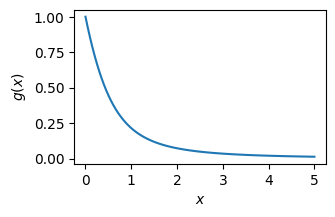

In [10]:
fig = plt.figure(figsize=(3.25, 2))
x = np.linspace(start=0., stop=5., num=100)
plt.plot(x, g1(x))
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.show()

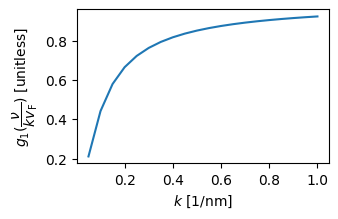

In [11]:
fig = plt.figure(figsize=(3.25, 2))
plt.plot(k.to('1/nm').magnitude, g1(nu_bar.to_base_units().magnitude))
plt.xlabel('$k$ [1/nm]')
plt.ylabel('$g_1(\\dfrac{\\nu}{k v_{\\mathrm{F}}})$ [unitless]')
plt.show()

Create and plot the function $f_{\mathrm{l}}^{\prime\prime}(\tilde{\omega} + i \tilde{\nu})$, equation 16 in Loring 2022.  Call this function `g2`.

In [12]:
def g2(x, y):
    try:
        x = x.to_base_units()
        y = y.to_base_units()
    except:
        pass
    return -1.0 * x * (y / (1 + y*y) + (g1(y) - 1) / y)

In [13]:
g2(omega_bar, nu_bar)

Magnitude,[1.99881682280419e-10 2.5063017773700835e-10 2.2532186337259449e-10 1.9463638116179525e-10 1.6886555601802527e-10 1.482808992463445e-10 1.3181676761290846e-10 1.1847426595364681e-10 1.0749524321522497e-10 9.832773714336642e-11 9.057044239499432e-11 8.392831879262773e-11 7.818117445682462e-11 7.316207735199412e-11 6.874253661390941e-11 6.482223425915154e-11 6.132181369911896e-11 5.8177740012521486e-11 5.5338582326601785e-11 5.2762286227486406e-11]
Units,dimensionless


/Users/jam99/Library/Caches/pypoetry/virtualenvs/dissipationtheory-Uvi85QQO-py3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


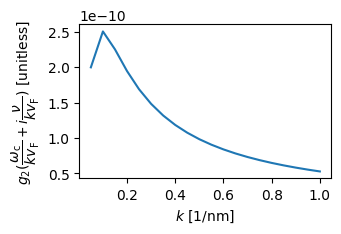

In [14]:
fig = plt.figure(figsize=(3.25, 2))
plt.plot(k.to('1/nm').magnitude, g2(omega_bar, nu_bar))
plt.xlabel('$k$ [1/nm]')
plt.ylabel('$g_2(\\dfrac{\\omega_{\\mathrm{c}}}{k v_{\\mathrm{F}}}' 
           '+ i \\dfrac{\\nu}{k v_{\\mathrm{F}}})$ [unitless]')
plt.show()

Create and plot the dielectric function $\epsilon_{\mathrm{l}}(k, \omega)$, equation 7 in Loring 2022.  Call this function `\epsilon_Loring`

In [15]:
def epsilon_Loring(k, cantilever, metal):
    
    omega_bar = (cantilever['omega_c']/(k * metal['v_F'])).to_base_units()
    nu_bar = (metal['nu']/(k * metal['v_F'])).to_base_units()
    omega_p_bar = (metal['omega_p']/(k * metal['v_F'])).to_base_units()
    
    numerator = (omega_bar + 1j * nu_bar) * (g1(nu_bar) + 1j * g2(omega_bar, nu_bar))
    denominator = omega_bar + 1j * nu_bar * (g1(nu_bar) + 1j * g2(omega_bar, nu_bar))
    
    return 1 + 3 * np.power(omega_p_bar, 2.0) * numerator / denominator

For comparison, here is the Drude dielectric function disscussed in the first paragraph of page 6311 in Loring 2022.  Call this function `epsilon_Drude`.  This function does not depend on $k$.  However, if you feed it an array of $k$ values, the function will return an array of (repeated) values, convenient for plotting alongside `epsilon_Loring`.

In [16]:
def epsilon_Drude(k, cantilever, metal):
    
    denominator = cantilever['omega_c'] * (cantilever['omega_c'] + 1j * metal['nu'])
    result = ((1 - metal['omega_p'] * metal['omega_p'] / denominator)).to_base_units()
    return  result * np.ones(len(k))

Create an array of logarithmically-spaced wavevectors spanning a large range.

In [17]:
k_ = ureg.Quantity(np.logspace(start=-6, stop=2, num=500), "nm^{-1}")

Plot the real the imaginary parts of the two dielectric functions verus wavevector.  Observe that
* the real part of Loring's dielectric constant disagrees with the Drude model, in both sign an magnitude, while
* the imaginary part of Loring's dielectric function agrees with the Drude model in the $k \rightarrow 0$ limit.

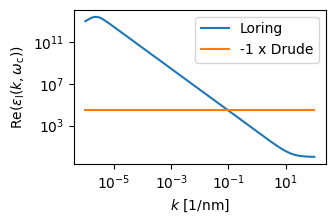

In [18]:
fig = plt.figure(figsize=(3.25, 2))
plt.loglog(k_.to('1/nm').magnitude, epsilon_Loring(k_, cantilever, metal).real, label='Loring')
plt.loglog(k_.to('1/nm').magnitude, -1*epsilon_Drude(k_, cantilever, metal).real, label='-1 x Drude')
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Re($\\epsilon_{\\mathrm{l}}(k , \\omega_{\\mathrm{c}})$)')
plt.legend()
plt.show()

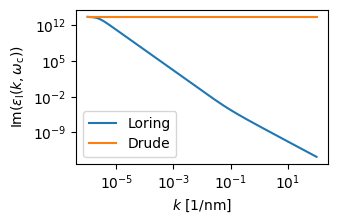

In [19]:
fig = plt.figure(figsize=(3.25, 2))
plt.loglog(k_.to('1/nm').magnitude, epsilon_Loring(k_, cantilever, metal).imag, label='Loring')
plt.loglog(k_.to('1/nm').magnitude, epsilon_Drude(k_, cantilever, metal).imag, label='Drude')
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Im($\\epsilon_{\\mathrm{l}}(k , \\omega_{\\mathrm{c}})$)')
plt.legend()
plt.show()

Now try to compute the sums $S_{\mathrm{e}}$ and $S_{\mathrm{o}}$, equations 4 and 5, respectively, in Loring 2022.  Start with $S_{\mathrm{e}}$.

In [20]:
prefactor = 2 / (k_ * metal['thickness']).to_base_units()
(prefactor.min(), prefactor.max())

(0.0002 <Unit('dimensionless')>, 20000.0 <Unit('dimensionless')>)

In [21]:
n_max = 500
n_array = np.arange(-n_max, n_max + 1)

In [22]:
k_2D, n_2D = np.meshgrid(k_.to_base_units().magnitude, n_array)
k_2D = k_2D * k.units
n_2D.shape

(1001, 500)

In [23]:
(k_2D.min(), k_2D.max())

(999.9999999999999 <Unit('1 / nanometer')>,
 99999999999.99998 <Unit('1 / nanometer')>)

In [24]:
(n_2D.min(), n_2D.max())

(-500, 500)

In [25]:
n_2D.sum(axis=0).shape

(500,)

In [26]:
numerator = (k_2D * k_2D).to_base_units().magnitude
(numerator.min(), numerator.max())

(9.999999999999996e+23, 9.999999999999997e+39)

In [27]:
k_parallel = 2 * np.pi * n_2D / metal['thickness']
(k_parallel.min(), k_parallel.max())

(-31.415926535897928 <Unit('1 / nanometer')>,
 31.415926535897928 <Unit('1 / nanometer')>)

In [28]:
denominator = (k_2D * k_2D + k_parallel * k_parallel) * epsilon_Loring(k_2D, cantilever, metal)
(denominator.min(), denominator.max())

((1000258.6734693875+1.4589290093641956e-11j) <Unit('1 / nanometer ** 2')>,
 (9.999999999999998e+21+1.4588234323136619e-19j) <Unit('1 / nanometer ** 2')>)

In [29]:
reflSe = prefactor*(numerator/denominator).sum(axis=0)

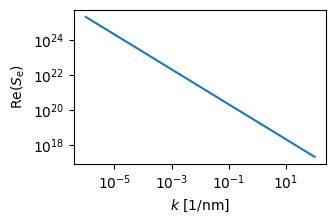

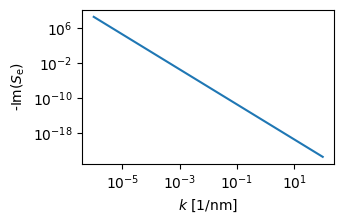

In [30]:
def plotcomplex(k_, y, ylabel):
    
    fig = plt.figure(figsize=(3.25, 2))
    plt.loglog(k_.to('1/nm').magnitude, y.real)
    plt.xlabel('$k$ [1/nm]')
    plt.ylabel('Re(' + ylabel + ')')
    plt.show()

    fig = plt.figure(figsize=(3.25, 2))
    plt.loglog(k_.to('1/nm').magnitude, -y.imag)
    plt.xlabel('$k$ [1/nm]')
    plt.ylabel('-Im(' + ylabel + ')')
    plt.show()
    
plotcomplex(k_, reflSe, '$S_{\\mathrm{e}}$')

Now create a proper function

In [31]:
def reflSe(k, cantilever, metal, nmax=500):
    
    prefactor = 2 / (k * metal['thickness'])
    n_array = np.arange(-n_max, n_max + 1)
    k_2D, n_2D = np.meshgrid(k.to_base_units().magnitude, n_array)
    k_2D = k_2D * k.units
    k_parallel = np.pi * 2 * n_2D / metal['thickness']
    numerator = (k_2D * k_2D)
    denominator = (k_2D * k_2D + k_parallel * k_parallel) * epsilon_Loring(k_2D, cantilever, metal)
    return prefactor*(numerator/denominator).to_base_units().sum(axis=0)

In [32]:
reflSe(k_, cantilever, metal).max()

(20008228.826504953-2.918303658366462e-10j) <Unit('dimensionless')>

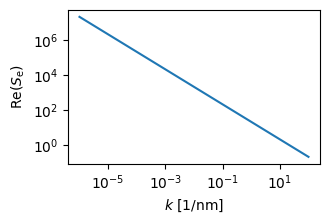

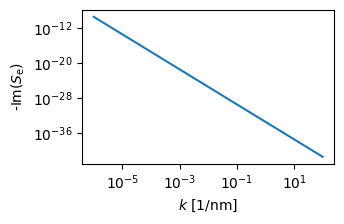

In [33]:
plotcomplex(k_, reflSe(k_, cantilever, metal), '$S_{\\mathrm{e}}$')

Now the other function

In [34]:
def reflSo(k, cantilever, metal, nmax=500):
    
    prefactor = 2 / (k * metal['thickness'])
    n_array = np.arange(-n_max, n_max + 1)
    k_2D, n_2D = np.meshgrid(k.to_base_units().magnitude, n_array)
    k_2D = k_2D * k.units
    k_parallel = np.pi * (2 * n_2D + 1) / metal['thickness']
    numerator = (k_2D * k_2D)
    denominator = (k_2D * k_2D + k_parallel * k_parallel) * epsilon_Loring(k_2D, cantilever, metal)
    return prefactor*(numerator/denominator).to_base_units().sum(axis=0)

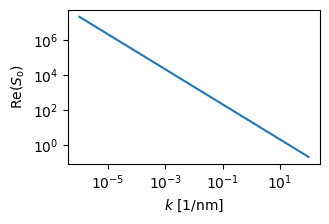

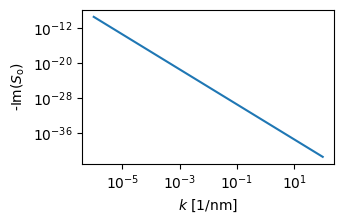

In [35]:
plotcomplex(k_, reflSo(k_, cantilever, metal), '$S_{\\mathrm{o}}$')

The reflection coefficient, plotted versus wavevector.

In [36]:
def rp(Se, So):
    return ( (1 - Se)/(1 + Se) + (1 - So)/(1 + So) )/2

In [37]:
(reflSe(k_, cantilever, metal).min(), reflSe(k_, cantilever, metal).max())

((0.20020000000000002-2.920564511491943e-42j) <Unit('dimensionless')>,
 (20008228.826504953-2.918303658366462e-10j) <Unit('dimensionless')>)

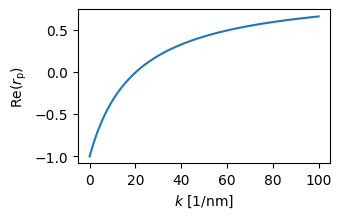

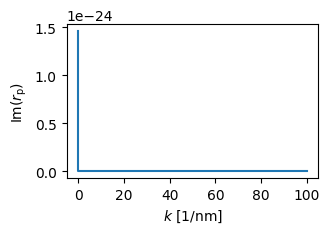

In [38]:
rp_data = rp(reflSe(k_, cantilever, metal), reflSo(k_, cantilever, metal))
             
fig = plt.figure(figsize=(3.25, 2))
plt.plot(k_.to('1/nm').magnitude, rp_data.real)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Re($r_{\\mathrm{p}}$)')
plt.show()

fig = plt.figure(figsize=(3.25, 2))
plt.plot(k_.to('1/nm').magnitude, rp_data.imag)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Im($r_{\\mathrm{p}}$)')
plt.show()             

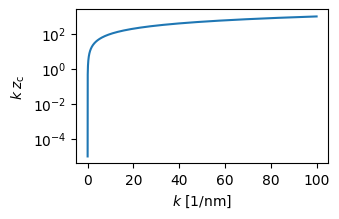

In [39]:
zc = ureg.Quantity(10, 'nm')
arg = (k_ * zc).to_base_units().magnitude

fig = plt.figure(figsize=(3.25, 2))
plt.semilogy(k_.to('1/nm').magnitude, arg)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('$k \: z_{\\mathrm{c}}$')
plt.show()

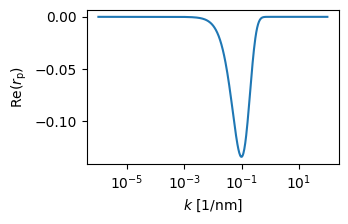

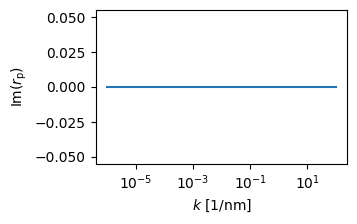

In [40]:
zc = ureg.Quantity(10, 'nm')
arg = (k_ * zc)
integrand = arg * arg * np.exp(-2 * arg) * rp_data.real

fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k_.to('1/nm').magnitude, integrand.real, '')
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Re($r_{\\mathrm{p}}$)')
plt.show()

fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k_.to('1/nm').magnitude, integrand.imag)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Im($r_{\\mathrm{p}}$)')

plt.show()  

1 -6.141906294848082
10 -6.7051263401936545
50 -6.758768752282703
100 -6.765518996634404


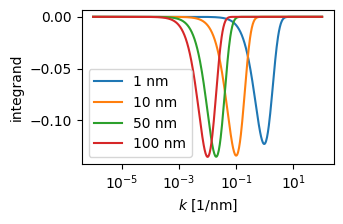

In [41]:
fig = plt.figure(figsize=(3.25, 2))
for height in [1, 10, 50, 100]:
    
    zc = ureg.Quantity(height, 'nm')
    arg = (k_ * zc)
    integrand = arg * arg * np.exp(-2 * arg) * rp_data.real
    plt.semilogx(k_.to('1/nm').magnitude, integrand.real, label='{:} nm'.format(height))
    print(height, integrand.real.magnitude.sum())
    
plt.xlabel('$k$ [1/nm]')
plt.ylabel('integrand')
plt.legend()
plt.show()

Check that the prefactor in the friction calculation, equation 2 in Loring 2022, has the proper units.

In [42]:
gamma_pre = (cantilever['q_c'] * cantilever['q_c'])/ \
    (8 * np.pi * epsilon0 * cantilever['omega_c'] * np.power(ureg.Quantity(1, 'nm'), 3))

gamma_pre.to_base_units()

2.294386499661828e-06 <Unit('kilogram / second')>

# Putting it all together

We want to use the `integrate.quad` function from `scipy` to carry out the integral.  The function does not know about units.  So write the integral in unitless form.

In [80]:
def rpintegrand(k, z, cantilever, metal):
    
    ku = k / z
    Se = reflSe(ku, cantilever, metal, nmax=500)
    So = reflSo(ku, cantilever, metal, nmax=500)
    rp = ( (1 - Se)/(1 + Se) + (1 - So)/(1 + So) )/2
    arg = (ku * z)
    integrand = arg * arg * np.exp(-2 * k) * rp.real

    return integrand.magnitude

In [81]:
rpintegrand(0.1, ureg.Quantity(10.0, 'nm'), cantilever, metal)

array([-0.00817913])

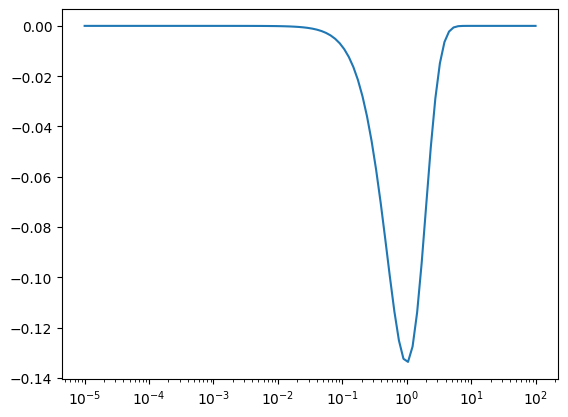

In [82]:
k_array = np.logspace(-5, 2, num=100)
plt.semilogx(k_array, rpintegrand(k_array, ureg.Quantity(10, 'nm'), cantilever, metal))
plt.show()

In [83]:
integrate.quad(rpintegrand, 0, np.inf, args=(ureg.Quantity(10, 'nm'), cantilever, metal, ))

(-0.24629071090269275, 3.1801201323018525e-11)

In [84]:
for thickness in [10, 100]:

    metal['thickness'] = ureg.Quantity(thickness, "nm") 
    print("\nthickness = {:.0f} nm".format(thickness))
    
    for height in [1, 10, 50, 100]:

        z = ureg.Quantity(height, 'nm')
        
        gamma_pre = (cantilever['q_c'] * cantilever['q_c'])/ \
            (8 * np.pi * epsilon0 * cantilever['omega_c'] * 
             np.power(z, 3))
        
        (result, err) = integrate.quad(
            rpintegrand, 
            0, np.inf, 
            args=(z, cantilever, metal, ))
        
        gamma = (gamma_pre * result).to('kg/s').magnitude
        unit = (gamma_pre * result).to('kg/s').units

        print("{:3d} nm {:0.4e} {:0.4e} {:}".format(height, result, gamma, unit))


thickness = 10 nm
  1 nm -2.4629e-01 -5.6509e-07 kilogram / second
 10 nm -2.4963e-01 -5.7274e-10 kilogram / second
 50 nm -2.4993e-01 -4.5874e-12 kilogram / second
100 nm -2.4996e-01 -5.7351e-13 kilogram / second

thickness = 100 nm
  1 nm -2.1587e-01 -4.9529e-07 kilogram / second
 10 nm -2.4629e-01 -5.6509e-10 kilogram / second
 50 nm -2.4925e-01 -4.5750e-12 kilogram / second
100 nm -2.4963e-01 -5.7274e-13 kilogram / second
